# Машинное обучение

# Тема 3. Препроцессинг и конструирование признаков

* [1. Сортировка](#chapter1)
* [2. Фильтрация](#chapter2)
* [3. Пропуски](#chapter3)
* [4. Масштабирование](#chapter4)
* [5. Перекодировка](#chapter5)
* [6. Выбросы](#chapter6)
* [7. Изменение и создание новых признаков](#chapter7)
* [8. Ранжирование](#chapter8) 
* [9. Сохранение датафрейма в файл](#chapter9)

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  # для визуализации
import seaborn as sns  # для визуализации
from scipy.stats import norm  # нормальное распределение
from scipy.stats.mstats import winsorize  # винзоризация
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler  # масштабирование признаков
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder  # перекодирование
from category_encoders import TargetEncoder  # перекодирование
from scipy.stats import kstest, skew, kurtosis  # тест Колмогорова-Смирнова, асимметрия, эксцесс
import warnings
warnings.filterwarnings('ignore')  # игнорируем предупреждения

### [Текучесть кадров и производительность труда](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

[Описание признаков](https://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2018FBL/IBM_Attrition_VSS.html)

| Имя признака                   | Описание признака                                     |
|------------------------|------------------------------------------------|
| Age                    | Numerical Value                                 |
| Attrition              | Employee leaving the company (0=no, 1=yes)     |
| BusinessTravel        | (1=No Travel, 2=Travel Frequently, 3=Travel Rarely) |
| DailyRate             | Numerical Value - Salary Level                  |
| Department             | (1=HR, 2=R&D, 3=Sales)                         |
| DistanceFromHome     | Numerical Value - THE DISTANCE FROM WORK TO HOME |
| Education              | Numerical Value                                 |
| EducationField        | (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6=TECHNICAL) |
| EmployeeCount         | Numerical Value                                 |
| EmployeeNumber        | Numerical Value - EMPLOYEE ID                   |
| EnvironmentSatisfaction| Numerical Value - SATISFACTION WITH THE ENVIRONMENT |
| Gender                 | (1=FEMALE, 2=MALE)                             |
| HourlyRate| Numerical Value - HOURLY SALARY                 |
| JobInvolvement        | Numerical Value - JOB INVOLVEMENT                |
| JobLevel              | Numerical Value - LEVEL OF JOB                   |
| JobRole               | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5=MANAGING DIRECTOR, 6=RESEARCH DIRECTOR, 7=RESEARCH SCIENTIST, 8=SALES EXECUTIVE, 9=SALES REPRESENTATIVE) |
| JobSatisfaction       | Numerical Value - SATISFACTION WITH THE JOB     |
| MaritalStatus         | (1=DIVORCED, 2=MARRIED, 3=SINGLE)               |
| MonthlyIncome         | Numerical Value - MONTHLY SALARY                 |
| MonthlyRate            | Numerical Value - MONTHLY RATE                   |
| NumCompaniesWorked    | Numerical Value - NO. OF COMPANIES WORKED AT    |
| Over18                | (1=YES, 2=NO)                                   |
| OverTime               | (1=NO, 2=YES)                                   |
| PercentSalaryHike    | Numerical Value - PERCENTAGE INCREASE IN SALARY |
| PerformanceRating     | Numerical Value - PERFORMANCE RATING             |
| RelationshipSatisfaction | Numerical Value - RELATIONS SATISFACTION         |
| StandardHours         | Numerical Value - STANDARD HOURS                  |
| StockOptionLevel    | Numerical Value - STOCK OPTIONS                   |
| TotalWorkingYears    | Numerical Value - TOTAL YEARS WORKED              |
| TrainingTimesLastYear| Numerical Value - HOURS SPENT TRAINING           |
| WorkLifeBalance      | Numerical Value - TIME SPENT BETWEEN WORK AND OUTSIDE |
| YearsAtCompany       | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPANY |
| YearsInCurrentRole  | Numerical Value - YEARS IN CURRENT ROLE           |
| YearsSinceLastPromotion | Numerical Value - LAST PROMOTION               |
| YearsWithCurrManager  | Numerical Value - YEARS SPENT WITH CURRENT MANAGER |


In [2]:
df = pd.read_csv("Employee_Attrition_na.csv", sep=';')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18.0,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,...,3.0,80,0,0,4,1,0,0,0,0
1,18.0,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,4.0,80,0,0,3,3,0,0,0,0
2,18.0,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,...,NaN,80,0,0,5,4,0,0,0,0
3,18.0,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,NaN,80,0,0,2,3,0,0,0,0
4,18.0,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,NaN,80,0,0,2,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,No,Travel_Rarely,836,Research & Development,8,3,Medical,1,84,...,3.0,80,3,21,2,3,5,0,0,2
1466,NaN,No,Travel_Rarely,1311,Research & Development,2,3,Life Sciences,1,505,...,3.0,80,0,30,2,3,5,4,1,2
1467,NaN,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,1032,...,1.0,80,0,30,4,3,5,3,4,3
1468,NaN,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,...,4.0,80,0,10,1,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1456 non-null   float64
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## 1. Сортировка<a class="anchor" id="chapter1"></a>

[Подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) про метод `sort_values()` и его параметры. По умолчанию сортировка происходит по возрастанию или в прямом алфавитном порядке.

In [4]:
df.sort_values(by='Age')  # исходный датафрейм не меняется

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18.0,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,...,3.0,80,0,0,4,1,0,0,0,0
1,18.0,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,4.0,80,0,0,3,3,0,0,0,0
2,18.0,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,...,NaN,80,0,0,5,4,0,0,0,0
3,18.0,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,NaN,80,0,0,2,3,0,0,0,0
4,18.0,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,NaN,80,0,0,2,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,No,Travel_Rarely,836,Research & Development,8,3,Medical,1,84,...,3.0,80,3,21,2,3,5,0,0,2
1466,NaN,No,Travel_Rarely,1311,Research & Development,2,3,Life Sciences,1,505,...,3.0,80,0,30,2,3,5,4,1,2
1467,NaN,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,1032,...,1.0,80,0,30,4,3,5,3,4,3
1468,NaN,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,...,4.0,80,0,10,1,3,2,2,2,2


In [5]:
df = df.sort_values(by='Age')  # исходный датафрейм меняется
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18.0,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,...,3.0,80,0,0,4,1,0,0,0,0
1,18.0,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,4.0,80,0,0,3,3,0,0,0,0
2,18.0,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,...,NaN,80,0,0,5,4,0,0,0,0
3,18.0,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,NaN,80,0,0,2,3,0,0,0,0
4,18.0,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,NaN,80,0,0,2,3,0,0,0,0


1.1. Отсортировать строки по дневному уровню оплаты труда по убыванию.

In [6]:
df.sort_values(by='DailyRate', ascending=False).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1469,NaN,No,Travel_Frequently,1499,Sales,28,3,Marketing,1,573,...,4.0,80,0,22,5,4,18,13,13,11
836,39.0,No,Travel_Rarely,1498,Sales,21,4,Life Sciences,1,1390,...,NaN,80,2,8,2,4,5,4,1,4
226,28.0,Yes,Travel_Frequently,1496,Sales,1,3,Technical Degree,1,1486,...,NaN,80,1,5,3,4,3,2,1,2
280,29.0,No,Non-Travel,1496,Research & Development,1,1,Technical Degree,1,208,...,NaN,80,1,10,1,3,10,7,0,9
1162,49.0,No,Travel_Rarely,1495,Research & Development,5,4,Technical Degree,1,1473,...,NaN,80,1,20,0,2,3,2,1,2


1.2. Отсортировать строки по названию отдела в алфавитном порядке.

In [7]:
df.sort_values(by='Department', ascending=True).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
758,37.0,Yes,Travel_Rarely,807,Human Resources,6,4,Human Resources,1,133,...,NaN,80,0,7,3,3,3,2,0,2
1253,54.0,No,Non-Travel,142,Human Resources,26,3,Human Resources,1,148,...,NaN,80,0,23,3,3,5,3,4,4
776,38.0,No,Travel_Frequently,1444,Human Resources,1,4,Other,1,1972,...,NaN,80,1,7,2,3,6,2,1,2
124,26.0,Yes,Travel_Rarely,920,Human Resources,20,2,Medical,1,1818,...,NaN,80,0,6,3,3,5,1,1,4
116,26.0,Yes,Travel_Frequently,426,Human Resources,17,4,Life Sciences,1,608,...,NaN,80,1,8,2,2,7,7,1,0


1.3. Отсортировать строки сперва по возрасту (по убыванию), потом по дневному уровню оплату труда (по возрастанию)

In [8]:
df.sort_values(by=['Age', 'DailyRate'], ascending=[False, True]).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1322,60.0,No,Travel_Rarely,370,Research & Development,1,4,Medical,1,1697,...,NaN,80,1,19,2,4,1,0,0,0
1321,60.0,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,...,NaN,80,0,33,5,1,29,8,11,10
1320,60.0,No,Travel_Rarely,696,Sales,7,4,Marketing,1,1233,...,NaN,80,1,12,3,3,11,7,1,9
1319,59.0,No,Travel_Rarely,142,Research & Development,3,3,Life Sciences,1,309,...,NaN,80,1,7,6,3,1,0,0,0
1315,59.0,No,Travel_Rarely,326,Sales,3,3,Life Sciences,1,1254,...,NaN,80,0,13,2,3,6,1,0,5


## 2. Фильтрация<a class="anchor" id="chapter2"></a>

На основе фильтрации можно создавать разные подвыборки. Лучше давать им новые названия (df2, df3 и пр.), чтобы можно было быстро вернуться к исходной версии датасета, не считывая данные из файла заново.

2.1. Отберем сотрудников с месячной зарплатой больше 20000.

In [9]:
df[df['MonthlyRate'] > 20000]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,18.0,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,NaN,80,0,0,2,3,0,0,0,0
16,19.0,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,167,...,NaN,80,0,0,2,2,0,0,0,0
15,19.0,No,Travel_Rarely,265,Research & Development,25,3,Life Sciences,1,1269,...,NaN,80,0,1,2,3,1,0,0,1
11,19.0,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,1,235,...,NaN,80,0,1,5,4,0,0,0,0
24,20.0,Yes,Travel_Rarely,500,Sales,2,3,Medical,1,922,...,NaN,80,0,2,3,2,2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,NaN,No,Travel_Rarely,942,Research & Development,3,3,Technical Degree,1,1786,...,NaN,80,0,15,2,3,2,2,2,2
1458,NaN,Yes,Travel_Rarely,1030,Sales,5,3,Life Sciences,1,1319,...,NaN,80,0,10,2,2,8,7,7,7
1461,NaN,No,Travel_Rarely,157,Research & Development,10,3,Medical,1,1980,...,NaN,80,0,9,3,3,5,2,1,4
1466,NaN,No,Travel_Rarely,1311,Research & Development,2,3,Life Sciences,1,505,...,3.0,80,0,30,2,3,5,4,1,2


In [10]:
df['MonthlyRate'] > 20000

0       False
1       False
2       False
3       False
4        True
        ...  
1465    False
1466     True
1467     True
1468    False
1469    False
Name: MonthlyRate, Length: 1470, dtype: bool

Результатом сравнения `df['MonthlyRate']` с числом `20000` является массив `pd.Series`, содержащий булевские элементы, являющиеся результатами попарного сравнения элементов `df['MonthlyRate']` с числом `20000`.

2.2. Выведем образовательные специализации сотрудников HR отдела с месячной зарплатой больше 20000.

In [11]:
df[(df['MonthlyRate'] > 20000) & (df['Department'] == 'Human Resources')][['EducationField']] 
# оба условия должны одновременно выполняться

,EducationField
116,Life Sciences
202,Medical
359,Human Resources
468,Human Resources
569,Life Sciences
688,Human Resources
758,Human Resources
905,Human Resources
936,Technical Degree
1028,Life Sciences


2.3. Отберем либо тех, у кого месячная зарплата больше 30000, либо тех, у кого дневная зарплата больше 1000.

In [12]:
df[(df['MonthlyRate'] > 30000) | (df['DailyRate'] > 1000)]  # хотя бы одно условие выполняется

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18.0,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,...,3.0,80,0,0,4,1,0,0,0,0
1,18.0,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,4.0,80,0,0,3,3,0,0,0,0
2,18.0,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,...,NaN,80,0,0,5,4,0,0,0,0
12,19.0,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201,...,NaN,80,0,1,3,3,1,0,0,0
20,20.0,No,Travel_Rarely,1141,Sales,2,3,Medical,1,1657,...,NaN,80,0,2,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,NaN,No,Travel_Rarely,1147,Sales,3,3,Marketing,1,303,...,NaN,80,1,16,4,3,6,2,0,5
1464,NaN,No,Travel_Rarely,1229,Research & Development,4,4,Life Sciences,1,1501,...,2.0,80,0,4,2,3,3,2,1,2
1466,NaN,No,Travel_Rarely,1311,Research & Development,2,3,Life Sciences,1,505,...,3.0,80,0,30,2,3,5,4,1,2
1468,NaN,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,...,4.0,80,0,10,1,3,2,2,2,2


2.4. Отберем тех, кто и не остался в компании, и не находится в семейных отношениях.

In [13]:
df[~((df['Attrition'] == 'No') | (df['MaritalStatus'] == 'Married'))]  # ни одно из условий не выполняется

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,18.0,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,4.0,80,0,0,3,3,0,0,0,0
4,18.0,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,NaN,80,0,0,2,3,0,0,0,0
5,18.0,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,...,NaN,80,0,0,2,4,0,0,0,0
7,18.0,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,...,NaN,80,0,0,0,3,0,0,0,0
16,19.0,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,167,...,NaN,80,0,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,NaN,Yes,Travel_Frequently,143,Sales,4,3,Marketing,1,488,...,NaN,80,0,8,5,3,8,7,7,7
1433,NaN,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,NaN,80,0,8,0,1,6,4,0,5
1440,NaN,Yes,Travel_Frequently,920,Research & Development,24,3,Life Sciences,1,392,...,NaN,80,1,19,0,1,1,0,0,0
1453,NaN,Yes,Travel_Frequently,1475,Research & Development,28,2,Life Sciences,1,1420,...,NaN,80,0,20,2,3,4,3,1,3


2.5. Отберем тех, у кого возраст от 30 до 40 лет включительно.

In [14]:
df[df['Age'].between(30, 40)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
328,30.0,No,Non-Travel,1116,Research & Development,2,3,Medical,1,571,...,NaN,80,0,12,2,2,11,7,6,7
327,30.0,No,Travel_Rarely,1082,Sales,12,3,Technical Degree,1,533,...,NaN,80,0,6,6,3,5,4,4,4
326,30.0,No,Travel_Rarely,1465,Research & Development,1,3,Medical,1,1241,...,NaN,80,1,12,2,3,11,9,5,7
325,30.0,No,Travel_Rarely,413,Sales,7,1,Marketing,1,585,...,NaN,80,0,4,3,3,3,2,1,2
323,30.0,No,Non-Travel,1398,Sales,22,4,Other,1,567,...,NaN,80,0,10,3,3,9,8,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,40.0,No,Travel_Rarely,523,Research & Development,2,3,Life Sciences,1,1346,...,NaN,80,0,9,4,3,9,8,8,8
866,40.0,No,Travel_Frequently,692,Research & Development,11,3,Technical Degree,1,1985,...,NaN,80,1,10,2,4,10,9,9,4
865,40.0,No,Travel_Rarely,329,Research & Development,1,4,Life Sciences,1,1361,...,NaN,80,1,7,3,3,4,2,0,3
864,40.0,Yes,Travel_Rarely,575,Sales,22,2,Marketing,1,492,...,NaN,80,2,8,6,3,6,4,1,0


2.6. Отберем тех, кто имеет образование в области HR, маркетинга или IT. 

In [15]:
df[df['EducationField'].isin(['Human Resources', 'Marketing', 'Technical Degree'])]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,18.0,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,4.0,80,0,0,3,3,0,0,0,0
16,19.0,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,167,...,NaN,80,0,0,2,2,0,0,0,0
14,19.0,Yes,Travel_Rarely,489,Human Resources,2,2,Technical Degree,1,566,...,NaN,80,0,1,3,4,1,0,0,0
11,19.0,Yes,Travel_Frequently,602,Sales,1,1,Technical Degree,1,235,...,NaN,80,0,1,5,4,0,0,0,0
26,20.0,Yes,Travel_Rarely,129,Research & Development,4,3,Technical Degree,1,960,...,2.0,80,0,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,NaN,No,Travel_Rarely,1125,Sales,10,3,Marketing,1,580,...,NaN,80,1,15,3,3,3,2,1,2
1457,NaN,No,Travel_Rarely,942,Research & Development,3,3,Technical Degree,1,1786,...,NaN,80,0,15,2,3,2,2,2,2
1462,NaN,No,Travel_Rarely,1147,Sales,3,3,Marketing,1,303,...,NaN,80,1,16,4,3,6,2,0,5
1468,NaN,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,...,4.0,80,0,10,1,3,2,2,2,2


## 3. Пропуски<a class="anchor" id="chapter3"></a>

Выведем строки, в которых отсутствует значение возраста.

In [16]:
df[df['Age'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1323,NaN,Yes,Travel_Rarely,337,Sales,7,1,Marketing,1,1780,...,NaN,80,0,1,3,3,1,0,1,0
1324,NaN,No,Travel_Rarely,1343,Sales,22,1,Technical Degree,1,669,...,NaN,80,0,3,2,3,3,2,1,2
1325,NaN,No,Non-Travel,895,Sales,9,2,Medical,1,484,...,NaN,80,0,3,3,2,3,2,2,2
1326,NaN,No,Travel_Rarely,604,Research & Development,6,1,Medical,1,675,...,NaN,80,0,3,3,3,2,2,2,2
1327,NaN,No,Travel_Rarely,373,Research & Development,1,2,Life Sciences,1,1270,...,NaN,80,1,1,2,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,NaN,No,Travel_Rarely,836,Research & Development,8,3,Medical,1,84,...,3.0,80,3,21,2,3,5,0,0,2
1466,NaN,No,Travel_Rarely,1311,Research & Development,2,3,Life Sciences,1,505,...,3.0,80,0,30,2,3,5,4,1,2
1467,NaN,No,Travel_Rarely,715,Research & Development,2,3,Life Sciences,1,1032,...,1.0,80,0,30,4,3,5,3,4,3
1468,NaN,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,732,...,4.0,80,0,10,1,3,2,2,2,2


In [17]:
df.isnull().sum()  # число пустых ячеек в каждом столбце

Age                          147
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction       14
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction               58
MaritalStatus                  0
MonthlyIncome                 29
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction    1217
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBa

`.dropna()` по всему датасету удалит все строки, в которых есть хотя бы один пропуск, в нашем случае мы лишаемся большей части строк.

In [18]:
print(df.shape)  # исходный датафрейм
df2 = df.dropna()  # удаление строк, содержащих хотя бы одну пустую ячейку (Nan)
print(df2.shape)  # датафрейм без пропусков 

(1470, 35)
(174, 35)


Ниже мы удаляем только тех сотрудников, у которых отсутствует информация о возрасте. Если вы анализируете парные взаимосвязи, то лучше удалить пропуски по паре рассматриваемых переменных, а потом анализировать их взаимосвязь.

In [19]:
print(df.shape) 
df3 = df.dropna(subset = ['Age'])  # удалить сотрудников, возраст которых не известен
print(df3.shape) 

(1470, 35)
(1323, 35)


Заменим пропущенные значения возраста медианой.

In [20]:
df['Age'].median()

36.0

In [21]:
df['Age_median'] = df['Age'].fillna(df['Age'].median())
df[['Age', 'Age_median']].sample(10)

,Age,Age_median
205,28.0,28.0
1083,46.0,46.0
508,33.0,33.0
1030,44.0,44.0
282,29.0,29.0
541,34.0,34.0
63,23.0,23.0
1423,NaN,36.0
159,27.0,27.0
149,27.0,27.0


Заменим пропущенные значения возраста медианой отдельно для мужчин и женщин.

In [22]:
df['Age_median_gender'] = df['Age'].fillna(df.groupby('Gender')['Age'].transform("median"))
df[df['Age'].isna()][['Age', 'Age_median', 'Gender', 'Age_median_gender']].sample(30)

,Age,Age_median,Gender,Age_median_gender
1364,NaN,36.0,Male,35.0
1418,NaN,36.0,Female,36.0
1448,NaN,36.0,Female,36.0
1426,NaN,36.0,Female,36.0
1397,NaN,36.0,Male,35.0
1389,NaN,36.0,Female,36.0
1455,NaN,36.0,Male,35.0
1461,NaN,36.0,Female,36.0
1410,NaN,36.0,Female,36.0
1326,NaN,36.0,Male,35.0


При работе с категориальными признаками заполнение пропусков можно осуществлять на основе моды.

In [23]:
df.EnvironmentSatisfaction.value_counts(dropna=False)

3.0    447
4.0    441
2.0    284
1.0    284
NaN     14
Name: EnvironmentSatisfaction, dtype: int64

In [24]:
df['EnvironmentSatisfaction'].mode()

0    3.0
Name: EnvironmentSatisfaction, dtype: float64

In [25]:
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].fillna(df['EnvironmentSatisfaction'].mode()[0])
df.EnvironmentSatisfaction.value_counts(dropna=False)

3.0    461
4.0    441
2.0    284
1.0    284
Name: EnvironmentSatisfaction, dtype: int64

## 4. Масштабирование<a class="anchor" id="chapter4"></a>

Рассмотрим как меняются гистограммы распределения значений признаков после применения к ним различных приемов масштабирования значений.

**Возраст**

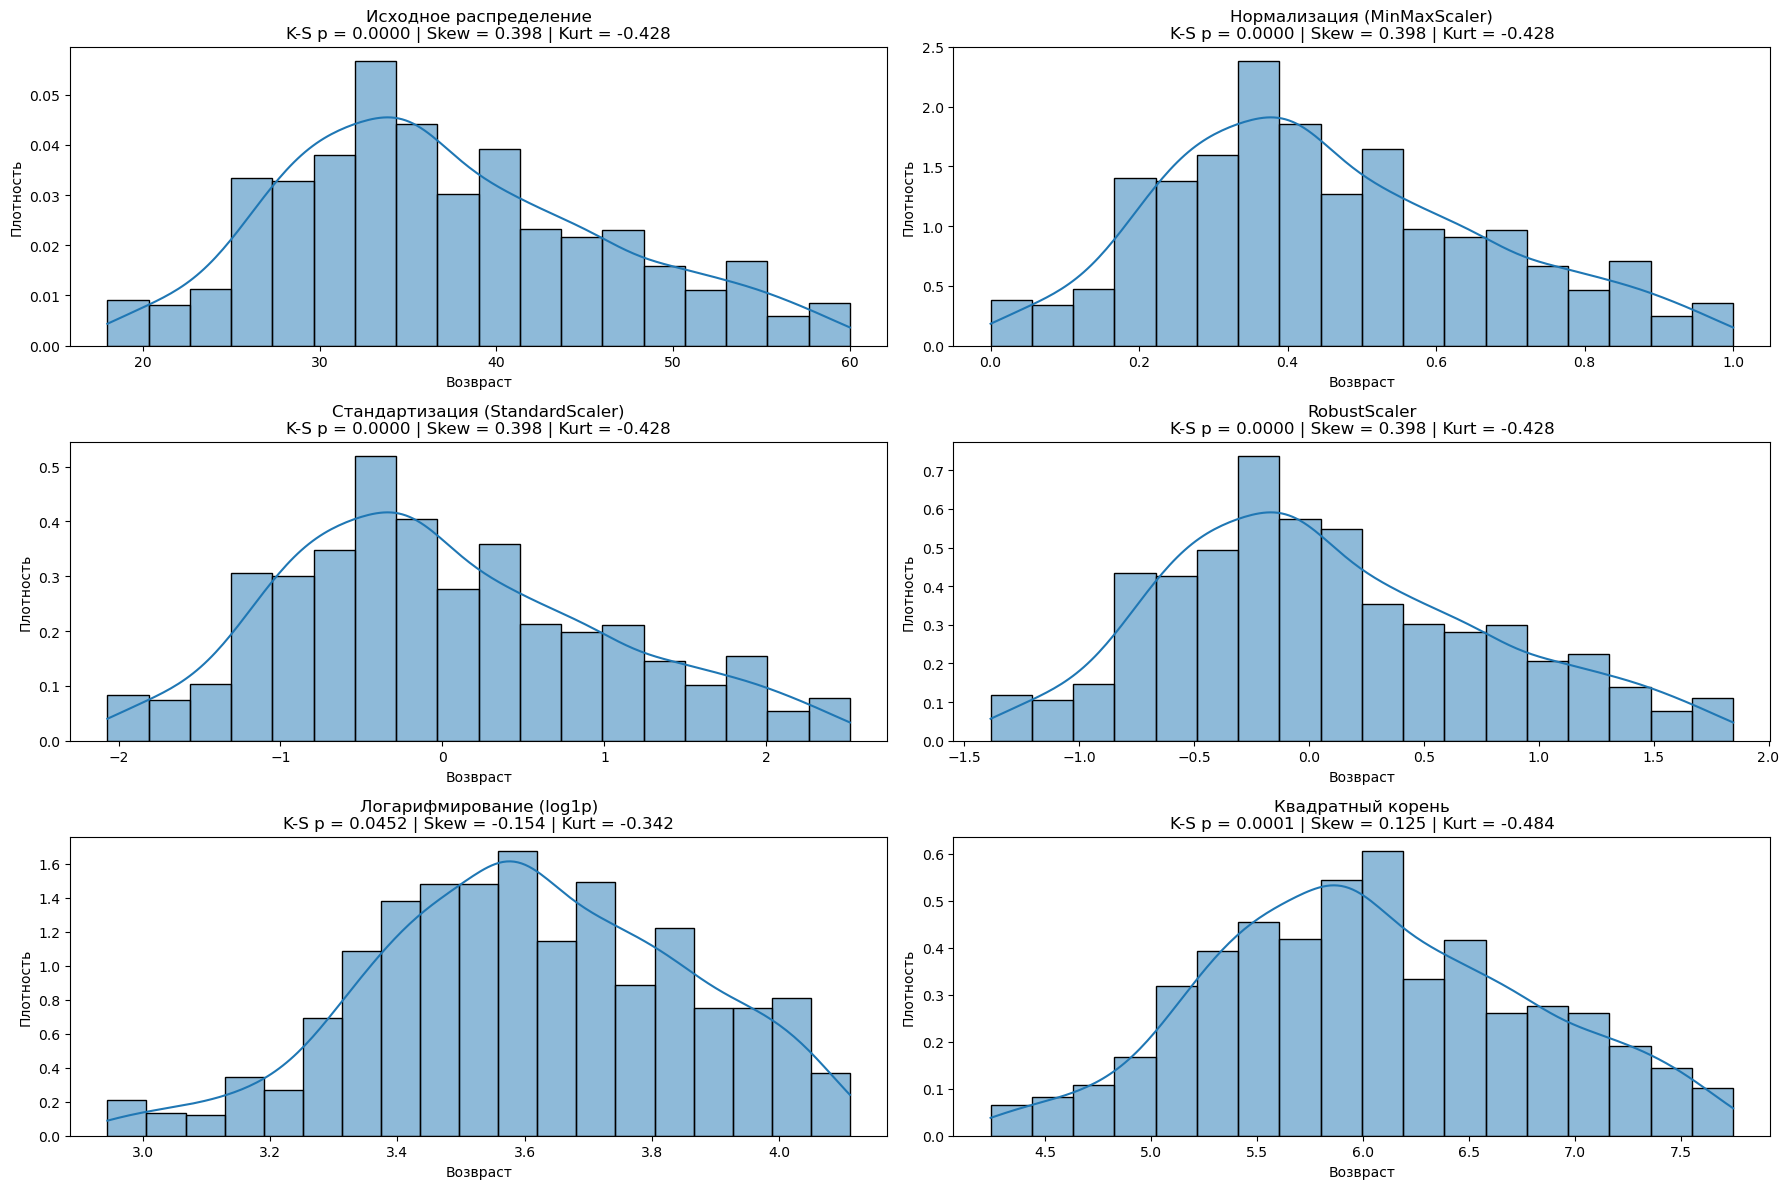

In [26]:
age = df['Age'].dropna().values.reshape(-1, 1)  # делаем формат подходящим для sklearn

# три вида масштабирования
age_minmax = MinMaxScaler().fit_transform(age)
age_standard = StandardScaler().fit_transform(age)
age_robust = RobustScaler().fit_transform(age)

# проверка на отрицательные значения
if np.any(age < 0):
    raise ValueError("В данных есть отрицательные значения — log и sqrt применять нельзя.")

age_log = np.log1p(age)
age_sqrt = np.sqrt(age)

plots = [
    (age, "Исходное распределение"),
    (age_minmax, "Нормализация (MinMaxScaler)"),
    (age_standard, "Стандартизация (StandardScaler)"),
    (age_robust, "RobustScaler"),
    (age_log, "Логарифмирование (log1p)"),
    (age_sqrt, "Квадратный корень")
]

plt.figure(figsize=(18, 12))

for i, (data, title) in enumerate(plots):
    data_flat = data.flatten()
    
    mu = np.mean(data_flat)
    sigma = np.std(data_flat)
    
    # K-S тест
    ks_stat, p_value = kstest(data_flat, 'norm', args=(mu, sigma))
    
    # асимметрия и эксцесс
    skewness = skew(data_flat)
    kurt = kurtosis(data_flat)  
    
    plt.subplot(3, 2, i + 1)
    sns.histplot(data_flat, kde=True, stat="density")
    
    plt.title(
        f"{title}\n"
        f"K-S p = {p_value:.4f} | "
        f"Skew = {skewness:.3f} | "
        f"Kurt = {kurt:.3f}"
    )
    
    plt.xlabel("Возвраст")
    plt.ylabel("Плотность")

plt.tight_layout()
plt.show()

**Стаж работы**

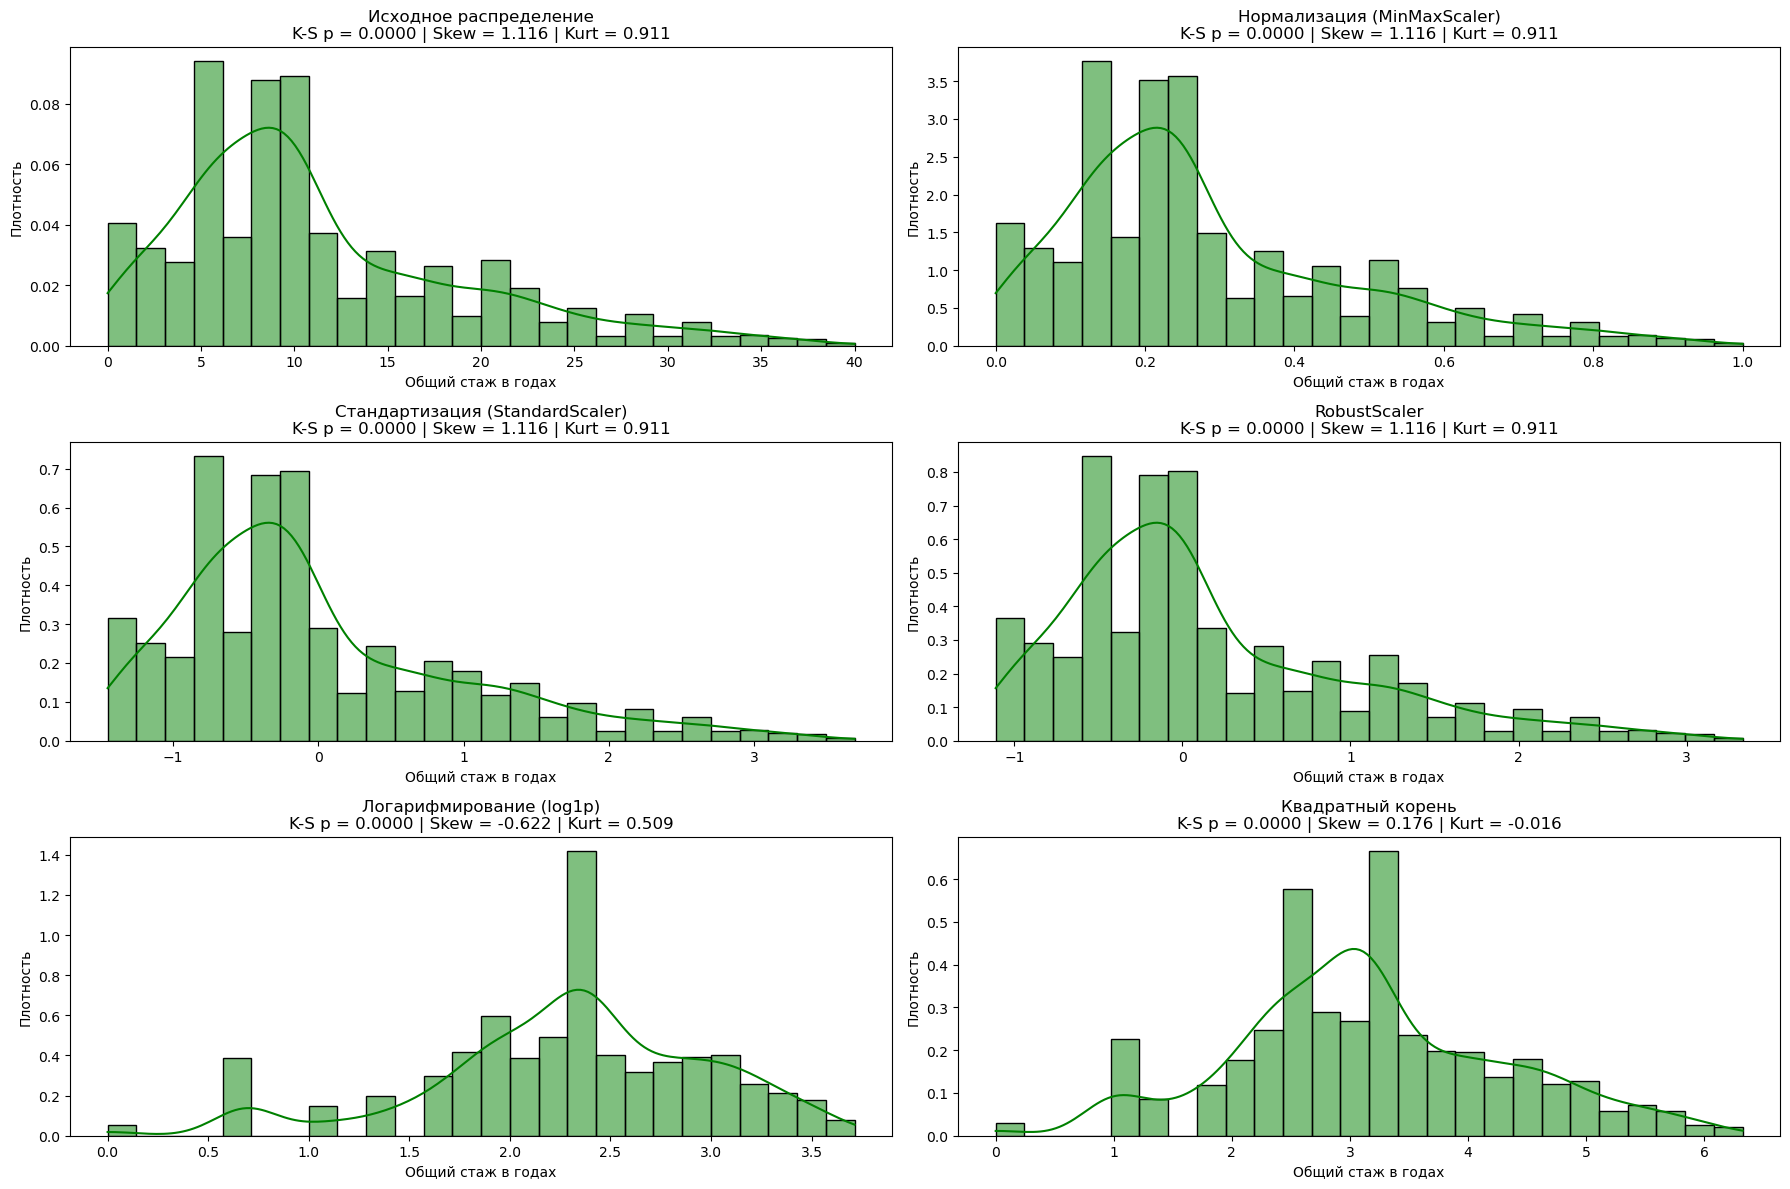

In [27]:
twy = df['TotalWorkingYears'].dropna().values.reshape(-1, 1)

twy_minmax = MinMaxScaler().fit_transform(twy)
twy_standard = StandardScaler().fit_transform(twy)
twy_robust = RobustScaler().fit_transform(twy)

if np.any(twy < 0):
    raise ValueError("В данных есть отрицательные значения — log и sqrt применять нельзя.")

twy_log = np.log1p(twy)
twy_sqrt = np.sqrt(twy)

plots = [
    (twy, "Исходное распределение"),
    (twy_minmax, "Нормализация (MinMaxScaler)"),
    (twy_standard, "Стандартизация (StandardScaler)"),
    (twy_robust, "RobustScaler"),
    (twy_log, "Логарифмирование (log1p)"),
    (twy_sqrt, "Квадратный корень")
]

plt.figure(figsize=(18, 12))

for i, (data, title) in enumerate(plots):
    data_flat = data.flatten()
    
    mu = np.mean(data_flat)
    sigma = np.std(data_flat)
    
    ks_stat, p_value = kstest(data_flat, 'norm', args=(mu, sigma))
    
    skewness = skew(data_flat)
    kurt = kurtosis(data_flat)  
    
    plt.subplot(3, 2, i + 1)
    sns.histplot(data_flat, kde=True, stat="density", color="green")
    
    plt.title(
        f"{title}\n"
        f"K-S p = {p_value:.4f} | "
        f"Skew = {skewness:.3f} | "
        f"Kurt = {kurt:.3f}"
    )
    
    plt.xlabel("Общий стаж в годах")
    plt.ylabel("Плотность")

plt.tight_layout()
plt.show()


## 5. Перекодировка<a class="anchor" id="chapter5"></a>

**5.1. One-Hot Encoding**

In [28]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [29]:
jobrole_encoded = pd.get_dummies(df['JobRole'], prefix='JobRole', dtype=int)
df = pd.concat([df, jobrole_encoded], axis=1)

df[['JobRole'] + list(jobrole_encoded.columns)].head()

,JobRole,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,Research Scientist,0,0,0,0,0,0,1,0,0
1,Sales Representative,0,0,0,0,0,0,0,0,1
2,Laboratory Technician,0,0,1,0,0,0,0,0,0
3,Sales Representative,0,0,0,0,0,0,0,0,1
4,Laboratory Technician,0,0,1,0,0,0,0,0,0


**5.2. Label Encoding**

In [30]:
df['JobRole_Label'] = LabelEncoder().fit_transform(df['JobRole'])

df[['JobRole', 'JobRole_Label']].sample(20)

,JobRole,JobRole_Label
651,Sales Executive,7
352,Manufacturing Director,4
293,Laboratory Technician,2
1067,Manager,3
124,Human Resources,1
1180,Healthcare Representative,0
819,Research Director,5
963,Research Scientist,6
981,Research Director,5
62,Sales Representative,8


Выведем только уникальные значения.

In [31]:
df[['JobRole', 'JobRole_Label']].drop_duplicates().sort_values('JobRole_Label').reset_index(drop=True)

,JobRole,JobRole_Label
0,Healthcare Representative,0
1,Human Resources,1
2,Laboratory Technician,2
3,Manager,3
4,Manufacturing Director,4
5,Research Director,5
6,Research Scientist,6
7,Sales Executive,7
8,Sales Representative,8


**5.3. Ordinal Encoding**

In [32]:
df[['BusinessTravel']].value_counts()

BusinessTravel   
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
dtype: int64

In [33]:
ordinal_encoder = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])
df['BusinessTravel_Ordinal'] = ordinal_encoder.fit_transform(df[['BusinessTravel']])

df[['BusinessTravel', 'BusinessTravel_Ordinal']].drop_duplicates().sort_values('BusinessTravel_Ordinal').reset_index(drop=True)

,BusinessTravel,BusinessTravel_Ordinal
0,Non-Travel,0.0
1,Travel_Rarely,1.0
2,Travel_Frequently,2.0


**5.4. Target Encoding**

Данные содержат пропуски. Заполним их средним.

In [34]:
df['MonthlyIncome_filled'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean())

In [35]:
df.groupby('JobRole')['MonthlyIncome_filled'].mean()

JobRole
Healthcare Representative     7519.266815
Human Resources               4235.750000
Laboratory Technician         3312.698295
Manager                      16885.734600
Manufacturing Director        7340.916590
Research Director            16033.550000
Research Scientist            3308.615954
Sales Executive               6890.533308
Sales Representative          2722.553648
Name: MonthlyIncome_filled, dtype: float64

In [36]:
encoder = TargetEncoder(cols=['JobRole'])
df['JobRole_TargetEnc'] = encoder.fit_transform(df['JobRole'], df['MonthlyIncome_filled'])

df[['JobRole', 'JobRole_TargetEnc']].drop_duplicates().sort_values('JobRole').reset_index(drop=True)

,JobRole,JobRole_TargetEnc
0,Healthcare Representative,7519.251578
1,Human Resources,4324.860887
2,Laboratory Technician,3312.698295
3,Manager,16882.885918
4,Manufacturing Director,7340.913498
5,Research Director,16010.004264
6,Research Scientist,3308.615954
7,Sales Executive,6890.533308
8,Sales Representative,2729.497596


**5.5. Frequency Encoding**

In [37]:
df['JobRole'].value_counts(normalize=True)

Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64

In [38]:
freq_enc = df['JobRole'].value_counts(normalize=True)
df['JobRole_FreqEnc'] = df['JobRole'].map(freq_enc)
df[['JobRole', 'JobRole_FreqEnc']].drop_duplicates().sort_values('JobRole_FreqEnc', 
                                                                 ascending=False).reset_index(drop=True)

,JobRole,JobRole_FreqEnc
0,Sales Executive,0.221769
1,Research Scientist,0.198639
2,Laboratory Technician,0.176190
3,Manufacturing Director,0.098639
4,Healthcare Representative,0.089116
5,Manager,0.069388
6,Sales Representative,0.056463
7,Research Director,0.054422
8,Human Resources,0.035374


**5.6. Rare Label Encoding**

In [39]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [40]:
# категории с частотой < 100 заменим на 'Rare'
threshold = 100
counts = df['JobRole'].value_counts()
rare_categories = counts[counts < threshold].index

df['JobRole_RareEnc'] = df['JobRole'].apply(lambda x: 'Rare' if x in rare_categories else x)

df['JobRole_RareEnc'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Rare                         215
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Name: JobRole_RareEnc, dtype: int64

## 6. Выбросы<a class="anchor" id="chapter6"></a>

**Число лет работы на текущей позиции**

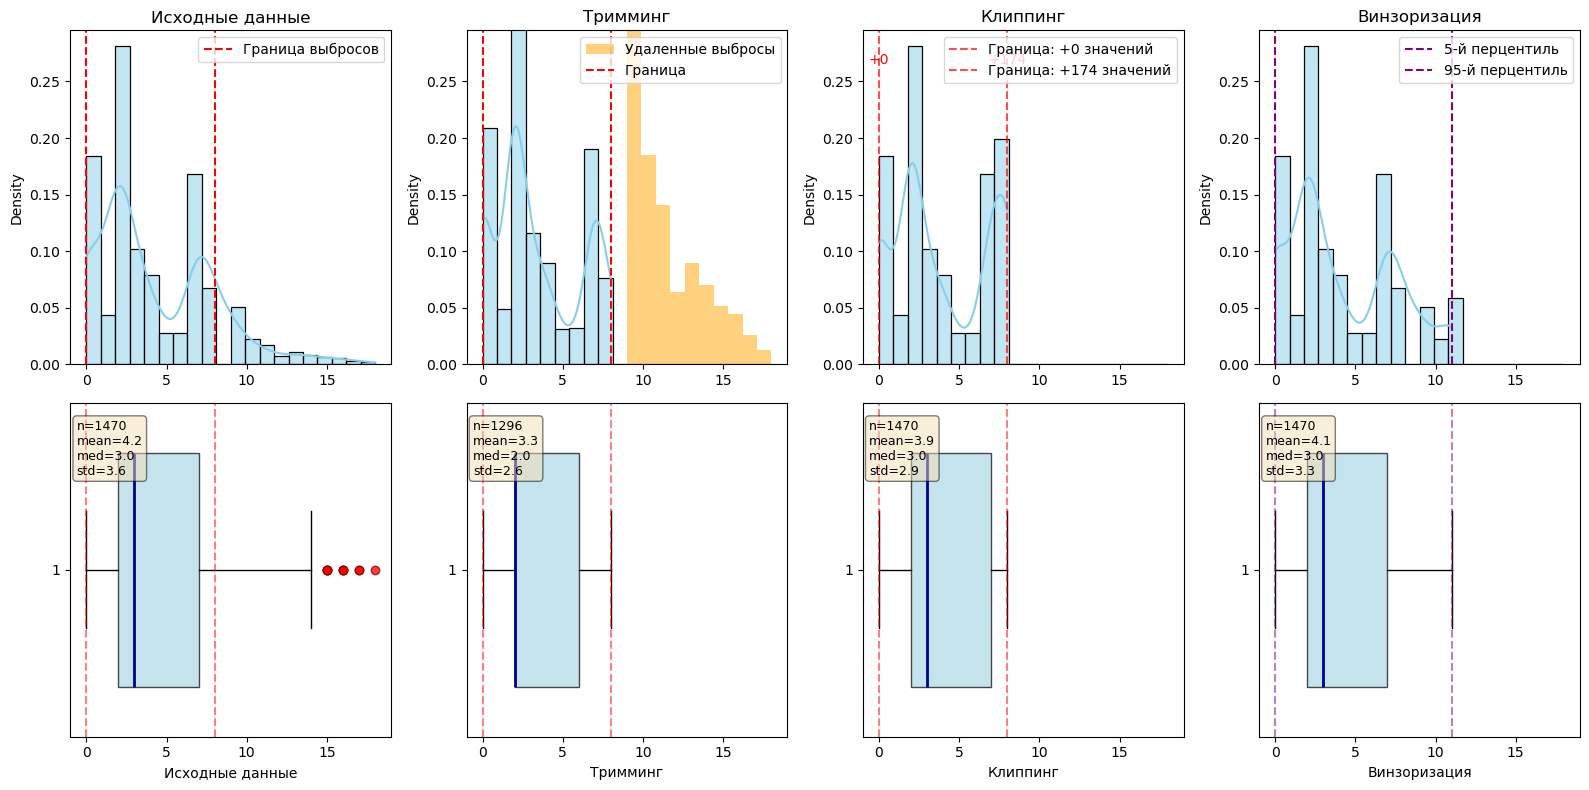

In [41]:
x = df['YearsInCurrentRole'].dropna().values

Q1, Q3 = np.percentile(x, [25, 75])
IQR = Q3 - Q1

low, high = 0, 8
# low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
# альтернативный вариант

# клиппинг - значения заменяются на границы
clipped_data = np.clip(x, low, high)

data = [
    x,
    x[(x >= low) & (x <= high)],          # тримминг - удаление
    clipped_data,                         # клиппинг - замена на границы
    winsorize(x, limits=[0.05, 0.05])     # винзоризация - замена на перцентили
]

labels = ["Исходные данные", "Тримминг", "Клиппинг", "Винзоризация"]

plt.figure(figsize=(16,8))

# определяем единые границы по X для всех графиков
x_min, x_max = x.min(), x.max()
x_limits = (x_min - 1, x_max + 1)

# определяем единое количество бинов
n_bins = 20

for i, d in enumerate(data):
    # создаем подграфик с 2 рядами (гистограмма сверху, boxplot снизу)
    plt.subplot(2, 4, i+1)  
    sns.histplot(d, kde=True, stat="density", color='skyblue', 
                 edgecolor='black', bins=n_bins, binrange=(x_min, x_max))

    if i == 0:
        plt.axvline(low, color='red', linestyle='--', label='Граница выбросов')
        plt.axvline(high, color='red', linestyle='--')
    
    elif i == 1:  # Тримминг
        removed = x[(x < low) | (x > high)]
        plt.hist(removed, bins=n_bins, range=(x_min, x_max), 
                 color='orange', alpha=0.5, density=True, label='Удаленные выбросы')
        plt.axvline(low, color='red', linestyle='--', label='Граница')
        plt.axvline(high, color='red', linestyle='--')
    
    elif i == 2:  # Клиппинг
        clipped_low = x[x < low]
        clipped_high = x[x > high]
        
        plt.axvline(low, color='red', linestyle='--', alpha=0.7, 
                    label=f'Граница: +{len(clipped_low)} значений')
        plt.axvline(high, color='red', linestyle='--', alpha=0.7, 
                    label=f'Граница: +{len(clipped_high)} значений')
        
        y_max = plt.ylim()[1]
        plt.text(low, y_max*0.9, f'+{len(clipped_low)}', ha='center', fontsize=10, color='red')
        plt.text(high, y_max*0.9, f'+{len(clipped_high)}', ha='center', fontsize=10, color='red')
    
    elif i == 3:  # Винзоризация
        p5 = np.percentile(x, 5)
        p95 = np.percentile(x, 95)
        plt.axvline(p5, color='purple', linestyle='--', label='5-й перцентиль')
        plt.axvline(p95, color='purple', linestyle='--', label='95-й перцентиль')
    
    plt.title(labels[i])
    plt.legend()
    plt.xlim(x_limits)

    # устанавливаем одинаковые пределы по Y
    if i == 0:
        ylim = plt.ylim()
    else:
        plt.ylim(ylim)
    
    # добавляем boxplot под гистограммой
    plt.subplot(2, 4, i+5)  
    bp = plt.boxplot(d, vert=False, patch_artist=True, widths=0.7)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    bp['fliers'][0].set_marker('o')
    bp['fliers'][0].set_markerfacecolor('red')
    bp['fliers'][0].set_markeredgecolor('darkred')
    bp['fliers'][0].set_alpha(0.5)
    bp['medians'][0].set_color('darkblue')
    bp['medians'][0].set_linewidth(2)
    
    # добавляем вертикальные линии границ
    if i == 0:
        plt.axvline(low, color='red', linestyle='--', alpha=0.5)
        plt.axvline(high, color='red', linestyle='--', alpha=0.5)
    elif i == 1:
        plt.axvline(low, color='red', linestyle='--', alpha=0.5)
        plt.axvline(high, color='red', linestyle='--', alpha=0.5)
    elif i == 2:
        plt.axvline(low, color='red', linestyle='--', alpha=0.5)
        plt.axvline(high, color='red', linestyle='--', alpha=0.5)
    elif i == 3:
        plt.axvline(p5, color='purple', linestyle='--', alpha=0.5)
        plt.axvline(p95, color='purple', linestyle='--', alpha=0.5)
    
    plt.xlabel(labels[i])
    plt.xlim(x_limits)
    
    # добавляем статистику
    stats_text = f'n={len(d)}\nmean={np.mean(d):.1f}\nmed={np.median(d):.1f}\nstd={np.std(d):.1f}'
    plt.text(0.02, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

**Возраст**

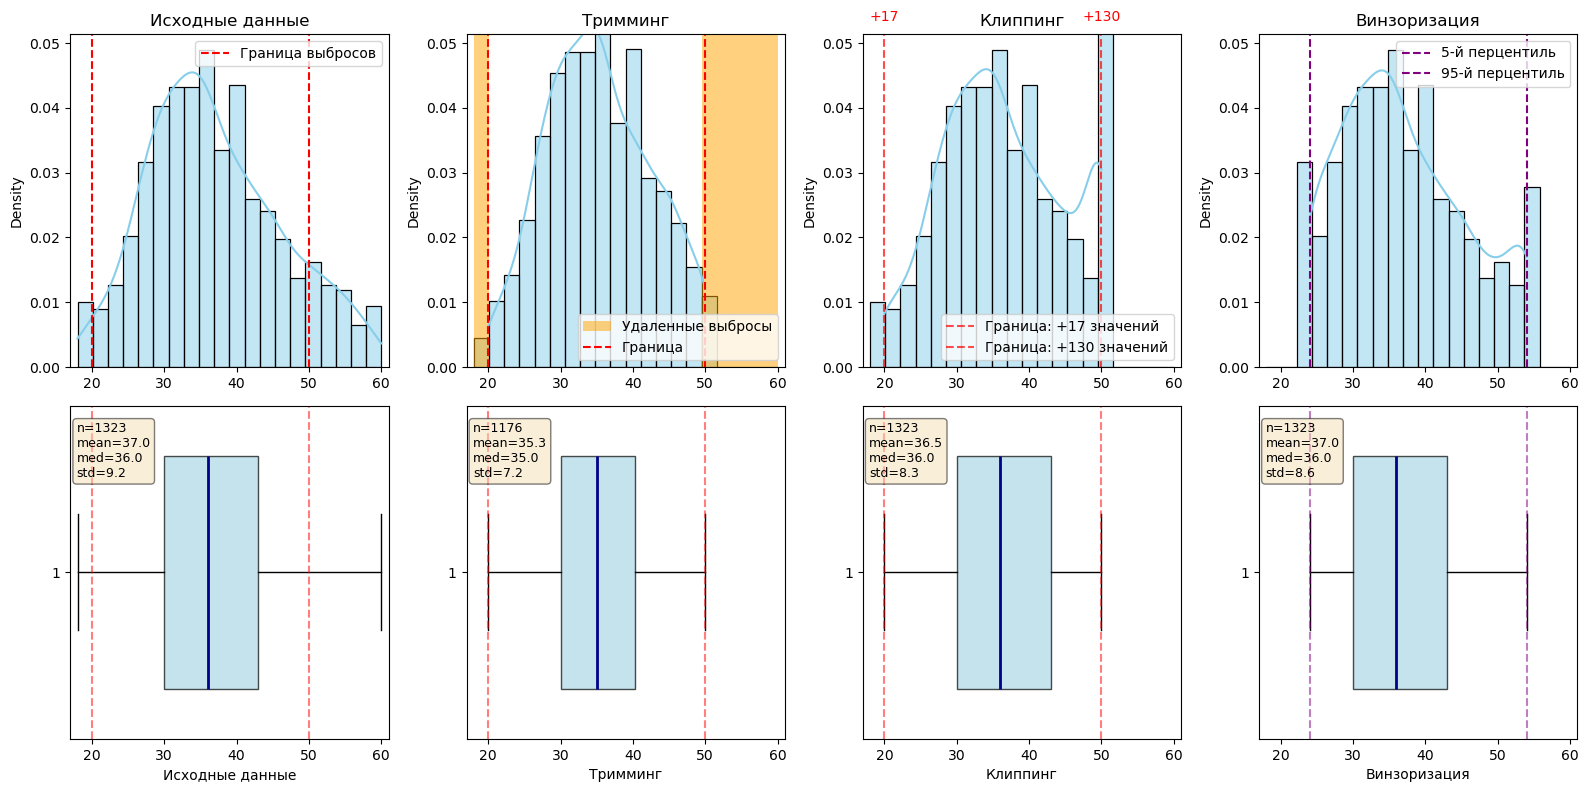

In [42]:
x = df['Age'].dropna().values

Q1, Q3 = np.percentile(x, [25, 75])
IQR = Q3 - Q1

low, high = 20, 50

#low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
# альтернативный вариант

# клиппинг - значения заменяются на границы
clipped_data = np.clip(x, low, high)

data = [
    x,
    x[(x >= low) & (x <= high)],          # тримминг - удаление
    clipped_data,                         # клиппинг - замена на границы
    winsorize(x, limits=[0.05, 0.05])     # винзоризация - замена на перцентили
]

labels = ["Исходные данные", "Тримминг", "Клиппинг", "Винзоризация"]

plt.figure(figsize=(16,8))

# определяем единые границы по X для всех графиков
x_min, x_max = x.min(), x.max()
x_limits = (x_min - 1, x_max + 1)

# определяем единое количество бинов
n_bins = 20

for i, d in enumerate(data):
    # создаем подграфик с 2 рядами (гистограмма сверху, boxplot снизу)
    plt.subplot(2, 4, i+1)  
    sns.histplot(d, kde=True, stat="density", color='skyblue', 
                 edgecolor='black', bins=n_bins, binrange=(x_min, x_max))

    if i == 0:
        plt.axvline(low, color='red', linestyle='--', label='Граница выбросов')
        plt.axvline(high, color='red', linestyle='--')
    
    elif i == 1:  # Тримминг
        removed = x[(x < low) | (x > high)]
        plt.hist(removed, bins=n_bins, range=(x_min, x_max), 
                 color='orange', alpha=0.5, density=True, label='Удаленные выбросы')
        plt.axvline(low, color='red', linestyle='--', label='Граница')
        plt.axvline(high, color='red', linestyle='--')
    
    elif i == 2:  # Клиппинг
        clipped_low = x[x < low]
        clipped_high = x[x > high]
        
        plt.axvline(low, color='red', linestyle='--', alpha=0.7, 
                    label=f'Граница: +{len(clipped_low)} значений')
        plt.axvline(high, color='red', linestyle='--', alpha=0.7, 
                    label=f'Граница: +{len(clipped_high)} значений')
        
        y_max = plt.ylim()[1]
        plt.text(low, y_max*0.9, f'+{len(clipped_low)}', ha='center', fontsize=10, color='red')
        plt.text(high, y_max*0.9, f'+{len(clipped_high)}', ha='center', fontsize=10, color='red')
    
    elif i == 3:  # Винзоризация
        p5 = np.percentile(x, 5)
        p95 = np.percentile(x, 95)
        plt.axvline(p5, color='purple', linestyle='--', label='5-й перцентиль')
        plt.axvline(p95, color='purple', linestyle='--', label='95-й перцентиль')
    
    plt.title(labels[i])
    plt.legend()
    plt.xlim(x_limits)

    # устанавливаем одинаковые пределы по Y
    if i == 0:
        ylim = plt.ylim()
    else:
        plt.ylim(ylim)
    
    # добавляем boxplot под гистограммой
    plt.subplot(2, 4, i+5)
    bp = plt.boxplot(d, vert=False, patch_artist=True, widths=0.7)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)
    bp['fliers'][0].set_marker('o')
    bp['fliers'][0].set_markerfacecolor('red')
    bp['fliers'][0].set_markeredgecolor('darkred')
    bp['fliers'][0].set_alpha(0.5)
    bp['medians'][0].set_color('darkblue')
    bp['medians'][0].set_linewidth(2)
    
    # Добавляем вертикальные линии границ
    if i == 0:
        plt.axvline(low, color='red', linestyle='--', alpha=0.5)
        plt.axvline(high, color='red', linestyle='--', alpha=0.5)
    elif i == 1:
        plt.axvline(low, color='red', linestyle='--', alpha=0.5)
        plt.axvline(high, color='red', linestyle='--', alpha=0.5)
    elif i == 2:
        plt.axvline(low, color='red', linestyle='--', alpha=0.5)
        plt.axvline(high, color='red', linestyle='--', alpha=0.5)
    elif i == 3:
        plt.axvline(p5, color='purple', linestyle='--', alpha=0.5)
        plt.axvline(p95, color='purple', linestyle='--', alpha=0.5)
    
    plt.xlabel(labels[i])
    plt.xlim(x_limits)
    
    # добавляем статистику
    stats_text = f'n={len(d)}\nmean={np.mean(d):.1f}\nmed={np.median(d):.1f}\nstd={np.std(d):.1f}'
    plt.text(0.02, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## 7. Изменение и создание новых признаков<a class="anchor" id="chapter7"></a>

7.1. Удаление признака

In [43]:
df = df.drop('Age_median', axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobRole_Label,BusinessTravel_Ordinal,MonthlyIncome_filled,JobRole_TargetEnc,JobRole_FreqEnc,JobRole_RareEnc
0,18.0,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,...,0,1,0,0,6,0.0,1514.0,3308.615954,0.198639,Research Scientist
1,18.0,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,...,0,0,0,1,8,2.0,1878.0,2729.497596,0.056463,Rare
2,18.0,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,...,0,0,0,0,2,0.0,1611.0,3312.698295,0.176190,Laboratory Technician
3,18.0,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,0,0,0,1,8,1.0,1200.0,2729.497596,0.056463,Rare
4,18.0,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,...,0,0,0,0,2,1.0,1420.0,3312.698295,0.176190,Laboratory Technician


7.2. Создание нового признака на основе модификации существующего (подсчет числа знаков в ячейке)

In [44]:
df["Department_len"] = df["Department"].apply(len)
df[["Department_len", "Department"]].sample(10)

,Department_len,Department
950,22,Research & Development
381,22,Research & Development
116,15,Human Resources
368,22,Research & Development
285,22,Research & Development
1375,5,Sales
260,22,Research & Development
741,22,Research & Development
1147,22,Research & Development
495,22,Research & Development


Создадим еще несколько новых признаков, которые могут стать хорошими предикторами в модели предсказания выгорания.

**a. Возраст на момент начала карьеры**

In [45]:
df['age_at_start'] = df['Age'] - df['TotalWorkingYears']

<Axes: >

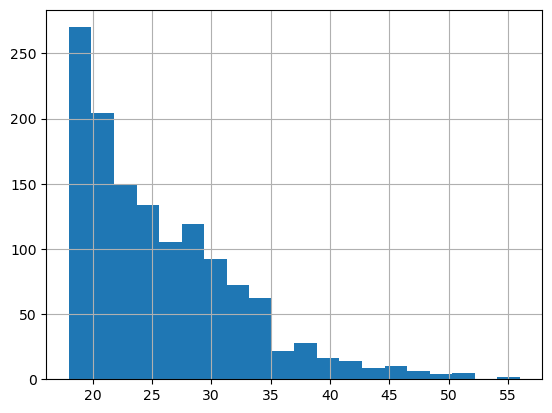

In [46]:
df['age_at_start'].hist(bins=20)

**b. Доля карьеры в текущей компании**

In [47]:
df['company_tenure_ratio'] = df['YearsAtCompany'] / df['TotalWorkingYears']

<Axes: >

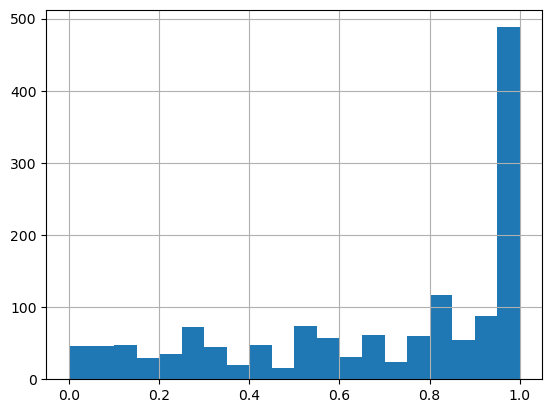

In [48]:
df['company_tenure_ratio'].hist(bins=20)

**c. Средняя удовлетворённость**

In [49]:
df['overall_satisfaction'] = df[['JobSatisfaction', 'EnvironmentSatisfaction', 
                                 'RelationshipSatisfaction']].mean(axis=1)

<Axes: >

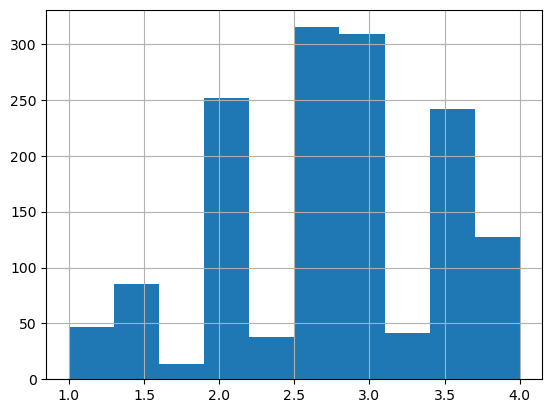

In [50]:
df['overall_satisfaction'].hist(bins=10)

**d. Карьерная фрустрация (потенциальный риск ухода)**

In [51]:
df['career_frustration'] = (
    (df['JobSatisfaction'] <= 2) &
    (df['YearsAtCompany'] >= 5) &
    (df['YearsSinceLastPromotion'] >= 3)
).astype(int)

In [52]:
df['career_frustration'].value_counts()

0    1332
1     138
Name: career_frustration, dtype: int64

**e. Возрастные группы (категориальные бины c заданными границами)**

In [53]:
df['age_group'] = pd.cut(
    df['Age'],
    bins=[18, 30, 40, 50, 60],
    labels=['Young', 'Mid', 'Senior', 'Pre-Retire']
)

In [54]:
df['age_group'].value_counts()

Mid           555
Young         336
Senior        294
Pre-Retire    130
Name: age_group, dtype: int64

**f. Группы дохода (по квартилям)**

In [55]:
df['income_group'] = pd.qcut(df['MonthlyIncome'], q=4, labels=False)

In [56]:
df['income_group'].value_counts()

0.0    361
1.0    361
3.0    360
2.0    359
Name: income_group, dtype: int64

### ! Придумайте еще несколько новых признаков

In [57]:
# здесь написать решение

In [58]:
# здесь написать решение

In [59]:
# здесь написать решение

7.3. Работа с категориальными признаками

In [60]:
df['age_group'].dtypes

CategoricalDtype(categories=['Young', 'Mid', 'Senior', 'Pre-Retire'], ordered=True)

In [61]:
df['age_group'].sample(20, random_state=42)

1057        Senior
160          Young
1214    Pre-Retire
87           Young
198          Young
465            Mid
461            Mid
266          Young
196          Young
41           Young
693            Mid
907         Senior
642            Mid
395            Mid
1423           NaN
1227    Pre-Retire
1255    Pre-Retire
729            Mid
239          Young
1053        Senior
Name: age_group, dtype: category
Categories (4, object): ['Young' < 'Mid' < 'Senior' < 'Pre-Retire']

In [62]:
df['age_group'].cat.codes.sample(20, random_state=42)

1057    2
160     0
1214    3
87      0
198     0
465     1
461     1
266     0
196     0
41      0
693     1
907     2
642     1
395     1
1423   -1
1227    3
1255    3
729     1
239     0
1053    2
dtype: int8

Это категориальная порядковая переменная. Можно вывести текстовые значения или привязанные к ним числовые коды (-1, 0, 1, 2, 3).

Переменная BusinessTravel по сути категориальная порядковая, а имеет тип object.

In [63]:
df['BusinessTravel'].dtypes

dtype('O')

In [64]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Перекодируем ее в категориальный или числовой тип с помощью метода Categorical.

In [65]:
df['BusinessTravel_ord'] = pd.Categorical(
    df['BusinessTravel'],
    categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
    ordered=True
)

In [66]:
df['BusinessTravel_ord'].dtypes

CategoricalDtype(categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)

In [67]:
df[['BusinessTravel', 'BusinessTravel_ord']].sample(10)

,BusinessTravel,BusinessTravel_ord
1453,Travel_Frequently,Travel_Frequently
1080,Travel_Rarely,Travel_Rarely
368,Travel_Frequently,Travel_Frequently
553,Travel_Rarely,Travel_Rarely
954,Travel_Frequently,Travel_Frequently
474,Travel_Rarely,Travel_Rarely
782,Travel_Rarely,Travel_Rarely
591,Travel_Frequently,Travel_Frequently
1211,Travel_Rarely,Travel_Rarely
20,Travel_Rarely,Travel_Rarely


In [68]:
df['BusinessTravel_ord'].cat.categories  # текстовые метки

Index(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], dtype='object')

In [69]:
df['BusinessTravel_ord'].cat.codes  # числовые коды

0       0
1       2
2       0
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    2
Length: 1470, dtype: int8

Теперь перекодируем в числовую.

In [70]:
df['BusinessTravel_ord_num'] = pd.Categorical(
    df['BusinessTravel'],
    categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
    ordered=True
).codes

In [71]:
df['BusinessTravel_ord'].dtypes

CategoricalDtype(categories=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ordered=True)

In [72]:
df[['BusinessTravel', 'BusinessTravel_ord', 'BusinessTravel_ord_num']].sample(15)

,BusinessTravel,BusinessTravel_ord,BusinessTravel_ord_num
1036,Travel_Rarely,Travel_Rarely,1
672,Travel_Rarely,Travel_Rarely,1
557,Travel_Rarely,Travel_Rarely,1
335,Travel_Rarely,Travel_Rarely,1
1089,Travel_Rarely,Travel_Rarely,1
135,Travel_Rarely,Travel_Rarely,1
1386,Travel_Rarely,Travel_Rarely,1
589,Travel_Rarely,Travel_Rarely,1
694,Travel_Rarely,Travel_Rarely,1
499,Travel_Rarely,Travel_Rarely,1


## 8. Ранжирование <a class="anchor" id="chapter8"></a>

8.1. Самый молодой сотрудник получает ранг 1, в случае одинаковых значений рассчитывается средний ранг.

In [73]:
df['Age_rank_1'] = df['Age'].rank()
df[['Age', 'Age_rank_1']].sort_values(by='Age').head(15) 

,Age,Age_rank_1
0,18.0,4.5
1,18.0,4.5
2,18.0,4.5
3,18.0,4.5
4,18.0,4.5
5,18.0,4.5
6,18.0,4.5
7,18.0,4.5
11,19.0,13.0
9,19.0,13.0


In [74]:
(1 + 2 + 3 + 4 + 5 + 6 + 7 + 8) / 8

4.5

8.2. Самый молодой сотрудник получает ранг 1, в случае одинаковых значений берется максимальный ранг.

In [75]:
df['Age_rank_2'] = df['Age'].rank(method='max') 
df[['Age', 'Age_rank_1', 'Age_rank_2']].sort_values(by='Age').head(15) 

,Age,Age_rank_1,Age_rank_2
0,18.0,4.5,8.0
1,18.0,4.5,8.0
2,18.0,4.5,8.0
3,18.0,4.5,8.0
4,18.0,4.5,8.0
5,18.0,4.5,8.0
6,18.0,4.5,8.0
7,18.0,4.5,8.0
11,19.0,13.0,17.0
9,19.0,13.0,17.0


8.3. Самый молодой сотрудник получает ранг 1, в случае одинаковых значений берется минимальный ранг.

In [76]:
df['Age_rank_3'] = df['Age'].rank(method='min') 
df[['Age', 'Age_rank_1', 'Age_rank_2', 'Age_rank_3']].sort_values(by='Age').head(15) 

,Age,Age_rank_1,Age_rank_2,Age_rank_3
0,18.0,4.5,8.0,1.0
1,18.0,4.5,8.0,1.0
2,18.0,4.5,8.0,1.0
3,18.0,4.5,8.0,1.0
4,18.0,4.5,8.0,1.0
5,18.0,4.5,8.0,1.0
6,18.0,4.5,8.0,1.0
7,18.0,4.5,8.0,1.0
11,19.0,13.0,17.0,9.0
9,19.0,13.0,17.0,9.0


In [77]:
df[['Age', 'Age_rank_1', 'Age_rank_2', 'Age_rank_3']].sort_values(by='Age').tail(15) 

,Age,Age_rank_1,Age_rank_2,Age_rank_3
1455,NaN,NaN,NaN,NaN
1456,NaN,NaN,NaN,NaN
1457,NaN,NaN,NaN,NaN
1458,NaN,NaN,NaN,NaN
1459,NaN,NaN,NaN,NaN
1460,NaN,NaN,NaN,NaN
1461,NaN,NaN,NaN,NaN
1462,NaN,NaN,NaN,NaN
1463,NaN,NaN,NaN,NaN
1464,NaN,NaN,NaN,NaN


8.4. Самый молодой сотрудник получает ранг 1, в случае одинаковых значений берется минимальный ранг. Если возраст не известен, наблюдение оказывается в конце рейтинга.

In [78]:
df['Age_rank_4'] = df['Age'].rank(method='min', na_option='bottom') 
df[['Age', 'Age_rank_1', 'Age_rank_2', 'Age_rank_3', 'Age_rank_4']].sort_values(by='Age').tail(15) 

,Age,Age_rank_1,Age_rank_2,Age_rank_3,Age_rank_4
1455,NaN,NaN,NaN,NaN,1324.0
1456,NaN,NaN,NaN,NaN,1324.0
1457,NaN,NaN,NaN,NaN,1324.0
1458,NaN,NaN,NaN,NaN,1324.0
1459,NaN,NaN,NaN,NaN,1324.0
1460,NaN,NaN,NaN,NaN,1324.0
1461,NaN,NaN,NaN,NaN,1324.0
1462,NaN,NaN,NaN,NaN,1324.0
1463,NaN,NaN,NaN,NaN,1324.0
1464,NaN,NaN,NaN,NaN,1324.0


8.5. Самый пожилой сотрудник получает ранг 1

In [79]:
df['Age_rank_5'] = df['Age'].rank(ascending=False) 
df[['Age', 'Age_rank_1', 'Age_rank_2', 'Age_rank_3', 
    'Age_rank_4', 'Age_rank_5']].sort_values(by='Age', ascending=False).head(15)

,Age,Age_rank_1,Age_rank_2,Age_rank_3,Age_rank_4,Age_rank_5
1322,60.0,1322.0,1323.0,1321.0,1321.0,2.0
1320,60.0,1322.0,1323.0,1321.0,1321.0,2.0
1321,60.0,1322.0,1323.0,1321.0,1321.0,2.0
1313,59.0,1316.0,1320.0,1312.0,1312.0,8.0
1319,59.0,1316.0,1320.0,1312.0,1312.0,8.0
1318,59.0,1316.0,1320.0,1312.0,1312.0,8.0
1317,59.0,1316.0,1320.0,1312.0,1312.0,8.0
1316,59.0,1316.0,1320.0,1312.0,1312.0,8.0
1314,59.0,1316.0,1320.0,1312.0,1312.0,8.0
1312,59.0,1316.0,1320.0,1312.0,1312.0,8.0


## 9. Сохранение датафрейма в файл<a class="anchor" id="chapter9"></a>

In [80]:
df.to_csv('data.csv')  # сохраняет только значения, не сохраняет форматы столбцов

In [81]:
df.to_excel('data.xlsx')  # сохраняет формат datetime

In [82]:
df.to_pickle('data.pkl')  # сохраняет все форматы колонок